Python Data Tools
===
There are a number of excellent libraries available to python for working with data. Almost all of these tools come with the Anaconda distribution of Python. To use a library you'll need to first `import` it. 

In [1]:
import numpy
import matplotlib
%matplotlib inline

where pandas is the name of the library we've just imported. Each time we use a class or function from an imported library, we'll need to specify which libray it comes from. For instance, to use the `rand` method from numpy's `random` module:

In [2]:
numpy.random.rand(4)

array([ 0.21760606,  0.26066627,  0.46884026,  0.0445164 ])

Because we reference the library name so often, it's common to create an alias for the library name. We can specify the alias as part of the import statement:

In [3]:
import numpy as np

Now, we can reference the numpy library like:

In [4]:
np.random.rand(4)

array([ 0.97316058,  0.93074251,  0.66201058,  0.46631956])

Numpy
---
The numpy library provides a set of tools for creating, manipulating, and operating on multi-dimensional arrays. Many of the operations available from the numpy library could also be performed using python's built in math library and for loops. However, numpy makes these operations easier to perform and executes them *much* more efficiently.

**Exercise 1.1:** 

Below we use numpy to create a sine wave from a 1,000,000 element array. Perform the same operation with a list, a for-loop, and the math.sin method. A timer is provided so you can record the execution time and compare the results

In [5]:
import time
import numpy as np
import math

x = np.arange(0,10,0.00001)
print("x is a %d element array"%len(x))

t0 = time.time()
y_np = np.sin(x)+np.cos(x)
print("this operation took %f seconds"% (time.time()-t0))

t0 = time.time()
# put your code here
print("this operation took %f seconds"% (time.time()-t0))

x is a 1000000 element array
this operation took 0.077672 seconds
this operation took 0.000100 seconds


In the exercise above you should have seen that with 1 million element array, numpy is around 10 times faster than a for-loop (try the same exercise with arrays of different sizes to see how your results vary).

Numpy is also great for working with multi-dimensional arrays and matrices. Let's look at an example in which we have a 12 element 1-dimensional array that we'd like to convert into a 4x3 2-dimensional array.

In [6]:
import numpy as np
a = np.arange(1,13)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [7]:
a = a.reshape(4,3)
a

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

Numpy also provides a way to select elements and slices of an array by their indices:

In [8]:
a[0,1]     # gets the element in the first row and second column

2

In [9]:
a[:,1]     # gets the array of elements in the second column

array([ 2,  5,  8, 11])

In [10]:
a[0:2,0:2] # gets the top left 2x2 square of elements

array([[1, 2],
       [4, 5]])

Numpy also allows us to perform boolean operations on an array *and* to use an array of boolean values to select certain elements from an array. Below we use a boolean operation to determine if each element in the array is even (by checking whether it is divisible by 2). Then we use numpy's boolean indexing feature to set all even elements to zero.

In [11]:
a%2==0  # modulus 2 is 0 for odd numbers

array([[False,  True, False],
       [ True, False,  True],
       [False,  True, False],
       [ True, False,  True]], dtype=bool)

In [12]:
a[a%2==0] = 0  # set all even numbers to 0
a

array([[ 1,  0,  3],
       [ 0,  5,  0],
       [ 7,  0,  9],
       [ 0, 11,  0]])

We won't cover all of what numpy can do in this module (including it's very useful matrix operations), but you can get a more thorough introduction here: http://wiki.scipy.org/Tentative_NumPy_Tutorial

Pandas
---
The numpy library treats a 2-dimensional array as an array of arrays. This has the advantage of being efficient but the disadvantage being somewhat cumbersome to work with. In most cases a 2-dimensional array is a collection of data points where each row represents an observation and each column represents a different feature that's been observed.

The pandas library stores data in a way that is more congruent with the observation/feature (or row/column) way of thinking about a data set. I provides: 
1. a *high level interface* to numpy arrays that much more intuitive and easier to work with and
2. a *set of tools* that make every step in the data science pipeline easier to perform

Where the base structure of numpy is an array, the base structure of pandas is a dataframe. The two object are very similar, but the pandas dataframe has the advantages of:
1. allowing different data types in a single dataframe and
2. providing labels for both rows and columns

The labeling is particularly useful for columns, as each columns typically represents a different feature.  In the example below we take a weeks worth of daily stock data (open and close prices), initially putting it into a numpy array, and then into a pandas dataframe.

In [13]:
import pandas as pd
data_np = np.array(  [[ 563.3,  553.2],
                   [ 556.6,  549.1],
                   [ 554.8,  548.9],
                   [ 556.8,  542.7],
                   [ 555.3,  544.5],
                   [ 552.2,  546.4],
                   [ 558.2,  545.5]])
columns = [["high","low"]]
dates = np.array(['3/10', '3/11', '3/12', '3/13', '3/16','3/17', '3/18'])
data_np

array([[ 563.3,  553.2],
       [ 556.6,  549.1],
       [ 554.8,  548.9],
       [ 556.8,  542.7],
       [ 555.3,  544.5],
       [ 552.2,  546.4],
       [ 558.2,  545.5]])

In [14]:
data_pd = pd.DataFrame(data_np,columns=columns,index=dates)
data_pd

,high,low
3/10,563.3,553.2
3/11,556.6,549.1
3/12,554.8,548.9
3/13,556.8,542.7
3/16,555.3,544.5
3/17,552.2,546.4
3/18,558.2,545.5


Notice that we need three different variables to fully describe the data with numpy and only one with pandas. Furthermore, pandas comes with a large set of tools for operating on dataframes. Let's say we wanted to sort our data by the low price:

In [15]:
data_pd.sort("low")

,high,low
3/13,556.8,542.7
3/16,555.3,544.5
3/18,558.2,545.5
3/17,552.2,546.4
3/12,554.8,548.9
3/11,556.6,549.1
3/10,563.3,553.2


Or suppose we have another dataset of open and close prices that we'd like to join with our existing data set:

In [16]:
df2 = pd.DataFrame([[ 553.6,  549.6],[ 551.9,  553.9 ],[ 551.9,  545.8],[ 549.4,  552.9],[ 550.1,  549.3],[ 550.9,  557.9],[ 557.8,  556.4],[ 560.1,  558.8]], 
        columns=["open","close"],
        index=['3/11', '3/12', '3/13', '3/16','3/17', '3/18', '3/19', '3/20'])
df2

,open,close
3/11,553.6,549.6
3/12,551.9,553.9
3/13,551.9,545.8
3/16,549.4,552.9
3/17,550.1,549.3
3/18,550.9,557.9
3/19,557.8,556.4
3/20,560.1,558.8


Notice that the dates for data_pd and df2 don't quite match. This might be a significant annoyance if we had to write a custom function to join these two dataframes, but fortunately we don't because pandas has a tool to do it for us:

In [17]:
df_joined = data_pd.join(df2,how='outer')
df_joined

,high,low,open,close
3/10,563.3,553.2,NaN,NaN
3/11,556.6,549.1,553.6,549.6
3/12,554.8,548.9,551.9,553.9
3/13,556.8,542.7,551.9,545.8
3/16,555.3,544.5,549.4,552.9
3/17,552.2,546.4,550.1,549.3
3/18,558.2,545.5,550.9,557.9
3/19,NaN,NaN,557.8,556.4
3/20,NaN,NaN,560.1,558.8


Pandas even has a tool for plotting your data in an ipython notebook:

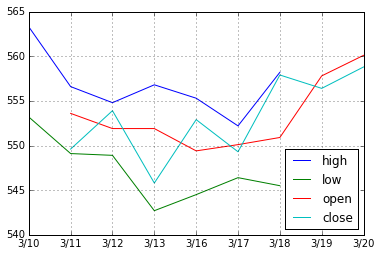

In [18]:
df_joined.plot()

Selecting data
--
**The .ix operator**

You can slice a pandas dataframe in the same way you slice a numpy array using the `.ix` operator:

In [19]:
df_joined.ix[1:4,1:3]

,low,open
3/11,549.1,553.6
3/12,548.9,551.9
3/13,542.7,551.9


The `.ix` operator works just like selection on numpy arrays. You can select a subset of both rows and columns (as done above), or select a single row or column (shown below)

In [20]:
df_joined.ix[1,:]  # not specifying the start or end index, default to the first and last index

high     556.6
low      549.1
open     553.6
close    549.6
Name: 3/11, dtype: float64

In [21]:
df_joined.ix[1:3,1]

3/11    549.1
3/12    548.9
Name: low, dtype: float64

When you select a single row or column, you get back a pandas Series object, which is a labeled 1-dimensional array similar to a python dictionary.

In [22]:
df_joined_one_row = df_joined.ix[0,:]  # df_joined_one_row is a Series object, all columns, but only the first row
df_joined_one_row["high"]  # we access a particular value just as if it were a dictionary

563.29999999999995

**The .loc operator**

The more common way to select data is by label using the `.loc` operator. The `.loc` operator can take 
- a single label:

In [23]:
df_joined.loc['3/10','low']  # select the "low" value from 3/10

553.20000000000005

- a list or array of labels

In [24]:
df_joined.loc['3/11',['low','high',"close"]]  # select the "low", "high", and "close" values from 3/11

low      549.1
high     556.6
close    549.6
Name: 3/11, dtype: float64

- a label slice object

In [25]:
df_joined.loc['3/10':'3/13','low']

3/10    553.2
3/11    549.1
3/12    548.9
3/13    542.7
Name: low, dtype: float64

- a boolean array or boolean series

In [26]:
bool_array = df_joined.loc[:,"high"]<556  # returns a boolean series which is True where the high value is less than 556 and False otherwise
df_joined.loc[bool_array,:]  # uses the boolean series above to select the "True" rows

,high,low,open,close
3/12,554.8,548.9,551.9,553.9
3/16,555.3,544.5,549.4,552.9
3/17,552.2,546.4,550.1,549.3


- or any combination of the above

In [27]:
df_joined.loc['3/10':'3/13',['low','high']]

,low,high
3/10,553.2,563.3
3/11,549.1,556.6
3/12,548.9,554.8
3/13,542.7,556.8


Pandas has a few more selection operators, including a `.query` operator that allows you to [select data with sql-like syntax](http://pandas.pydata.org/pandas-docs/stable/indexing.html#the-query-method-experimental). I won't cover all of those operators in this module, but you can read more [here](http://pandas.pydata.org/pandas-docs/stable/indexing.html).

Creating a dataframe
---
We've seen above that we can create a dataframe from a numpy array or from a list of lists. In both cases we have to also specify the column labels and the index labels. Neither labels are *required*, and if we don't specify them pandas defaults to integer index labels

In [28]:
pd.DataFrame(data_np)

,0,1
0,563.3,553.2
1,556.6,549.1
2,554.8,548.9
3,556.8,542.7
4,555.3,544.5
5,552.2,546.4
6,558.2,545.5


Integer index labels are oftentimes fine for rows, but you'll almost always want labels for your columns. You can also create a dataframe from a dictionary where the key is the desired column name and the value is a list of values for that column:

In [29]:
data_dict = {'low': [553,549,548,542,544,546,545],
             'high':[563,556,554,556,555,552,558]}
pd.DataFrame(data_dict)

,high,low
0,563,553
1,556,549
2,554,548
3,556,542
4,555,544
5,552,546
6,558,545


Notice that if we don't specify the column order with the `columns` param when creating a dataframe from a dictionary, the columns will be ordered alphabetically.

Pandas also has tools for dealing with dates.

In [30]:
dates = pd.date_range('2015-03-10', periods=7)
dates

DatetimeIndex(['2015-03-10', '2015-03-11', '2015-03-12', '2015-03-13',
               '2015-03-14', '2015-03-15', '2015-03-16'],
              dtype='datetime64[ns]', freq='D', tz=None)

In [31]:
df_with_dates = pd.DataFrame(data_np,columns=["high","low"],index=dates)
df_with_dates

,high,low
2015-03-10,563.3,553.2
2015-03-11,556.6,549.1
2015-03-12,554.8,548.9
2015-03-13,556.8,542.7
2015-03-14,555.3,544.5
2015-03-15,552.2,546.4
2015-03-16,558.2,545.5


Notice that the dates here are of type `datetime`, where before they were of type string. Having your dates as a `datetime` has several advantages. For one, a `datetime` object has *many* useful methods like getting the day of the week or finding the difference between to dates

In [32]:
df_with_dates['day_of_week'] = dates.dayofweek
df_with_dates

,high,low,day_of_week
2015-03-10,563.3,553.2,1
2015-03-11,556.6,549.1,2
2015-03-12,554.8,548.9,3
2015-03-13,556.8,542.7,4
2015-03-14,555.3,544.5,5
2015-03-15,552.2,546.4,6
2015-03-16,558.2,545.5,0


In [33]:
df_with_dates['days_since_mar_10'] = dates-dates[0]
df_with_dates

,high,low,day_of_week,days_since_mar_10
2015-03-10,563.3,553.2,1,0 days
2015-03-11,556.6,549.1,2,1 days
2015-03-12,554.8,548.9,3,2 days
2015-03-13,556.8,542.7,4,3 days
2015-03-14,555.3,544.5,5,4 days
2015-03-15,552.2,546.4,6,5 days
2015-03-16,558.2,545.5,0,6 days


And when using a dataframes `plot` method, the x-axis labels are always well formatted if the index is a datetime (this is not always the case if the dates are of type string):

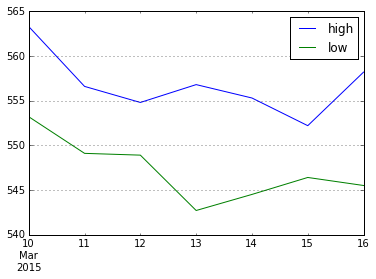

In [34]:
df_with_dates.loc[:,["high","low"]].plot()  # we use the .loc operator to select only the columns we want to plot

**Note:** If you have timeseries data, the dates don't have to be the index as we've done here. You could just as easily make them another column. If you chose to go that route, however, you'd need to specify which column to use as the x-axis when using the dataframes `plot` method (using the `x` parameter).

We'll see in the next module how to import data from a text file or a sql database directly into a pandas dataframe.

Dataframes at a quick glance
---
The dataframe that we've been working with in this module is relatively small. It is more common whoever to have dataframes with many more rows. In that case, you might still want to print your dataframe to the screen to see what you've got (what are the columns names and types, how sparse is the data, etc.), but you don't need (or want) to see the *all* of the data. In these cases the dataframes `head` and `tail` methods are very useful.

In [35]:
df_with_dates.head(3)

,high,low,day_of_week,days_since_mar_10
2015-03-10,563.3,553.2,1,0 days
2015-03-11,556.6,549.1,2,1 days
2015-03-12,554.8,548.9,3,2 days


Here we've used the `head` method to show only the first 3 rows in our dataframe. Similarly, we could use the `tail` method to see the rows at the end of the dataframe:

In [36]:
df_with_dates.tail(4)

,high,low,day_of_week,days_since_mar_10
2015-03-13,556.8,542.7,4,3 days
2015-03-14,555.3,544.5,5,4 days
2015-03-15,552.2,546.4,6,5 days
2015-03-16,558.2,545.5,0,6 days


Dataframes also come with a `describe` method to get some basic statistics for each column:

In [37]:
df_with_dates.describe()

,high,low,day_of_week,days_since_mar_10
count,7.000000,7.000000,7.000000,7
mean,556.742857,547.185714,3.000000,3 days 00:00:00
std,3.455362,3.501632,2.160247,2 days 03:50:45.332114
min,552.200000,542.700000,0.000000,0 days 00:00:00
25%,555.050000,545.000000,1.500000,1 days 12:00:00
50%,556.600000,546.400000,3.000000,3 days 00:00:00
75%,557.500000,549.000000,4.500000,4 days 12:00:00
max,563.300000,553.200000,6.000000,6 days 00:00:00


Visualizations are another great way to explore unfamiliar data that we'll cover in a future module.

**Exercise**

In the cell below, we've loaded a dataframe of  Facebook likes, Twitter followers, or Wikipedia pageviews data for The Prodigy and Yoko Ono. The "value" field is the daily increase or decrease in the metric value (Facebook likes, Twitter followers, or Wikipedia pageviews). 

In [183]:
metrics = pd.read_pickle('artist_metrics_small.pkl')  # loading our data frame from a pickle file (we'll cover this in the next module)
metrics.head()

,date,artist,metric,value
0,2014-04-01,Yoko Ono,Facebook likes,177
1,2014-04-02,Yoko Ono,Facebook likes,146
2,2014-04-03,Yoko Ono,Facebook likes,81
3,2014-04-04,Yoko Ono,Facebook likes,69
4,2014-04-05,Yoko Ono,Facebook likes,103


**part a:** the elements in the `date` column are of type string. Convert them into datetime objects.

In [ ]:
# your code here

**part b:** create three new dataframes, one for Facebook data, one for Twitter followers data, and one for Wikipeida pageviews data (hint: use the `.loc` operator).

In [219]:
# your code here

**part c:** For each of the new dataframes you created in part b, use the `.pivot` method to create a new dataframe where "Facebook likes", "Twitter Followers", and "Wikipeida pageviews" are columns and make "date" the dataframe's index. Doing this will reduce the length of your dataframes from part b by a factor of 3, and add three extra columns to the width. We would say that the dataframe in it's original form was in a "stacked" or "long" format and after we perform the pivot it's in a "wide" format. The long format is often preferable for sparse data (where say one or both artists were missing data for most days), and the wide format is often preferred when plotting or performing analysis. Once you pivot both dataframes to a wide format, plot the results. Be sure to label the axis of your plots and give them titles.

In [227]:
# define the pivotted facebook dataframe and plot in this cell

In [228]:
# define the pivotted twitter dataframe and plot in this cell

In [229]:
# define the pivotted wikipedia dataframe and plot in this cell

**part d**: take the pivotted wikipedia dataframe and add a day_of_week column.

In [230]:
# your code here

**part e:** Use the dateframe's `.group_by` method to get the mean value for each day of the week. Plot the results for both artists.

In [231]:
# your code here

**part f:** Using the results from part d, create a new dataframe with just data for *The Prodigy*. With this new dataframe, create a new "week_of_year" column. Now pivot this dataframe, making the day_of_week values the new columns, the values from "The Prodigy" column the values, and the "week_of_year" the new index. In this new dataframe, the values in the column labeled "0" are all the values from Mondays and the values in the column labeled "6" are all the values from Sundays.

In [232]:
# your code here

**part g:** replace the numeric column labels with the list of days as strings defined below. Plot the results as a boxplot (look at the `kind` parameter for the `.plot` method). Add the parameter `sym=''` to the plot method to hide the outliers.

In [233]:
days = ['MON','TUE','WED','THU','FRI','SAT','SUN']
# your code here